Rate of transcription, lambda = 2

Total time, T = 10



In [48]:
# Inputs for simulations

# Rate of transcription
lambda = 2.0  

# Total time
T = 10.0    

# Initial number of mRNA
mRNA_0 = 0

# Total number of independent simulations
N = 1000

1000

In [49]:
# Call the packages
using Distributions
using Plots

In [50]:
# Function to simulate a Poisson process

# Inputs:
# lambda: Rate of the process. Float64
# T: Total time for simulation. Float64
# x0: Initial count. Int

# Outputs:
# event_times: A vector listing time points of events
# event_counts: A vector listing cumulative count of events for each time point in event_times

function simulate_poisson(lambda::Float64, T::Float64, x0::Int)
    event_times = [0.0]   # To store the time of each event
    event_counts = [x0]      # To store the cumulative event count
    current_time = 0.0
    count = x0

    while current_time < T
        # Generate inter-arrival time from an exponential distribution
        inter_event_time = rand(Exponential(1 / lambda))

        # Update clock
        current_time += inter_event_time
        
        # Check if current_time is still within the desired time limit
        if current_time <= T
            count += 1                     # Increment the count of events
            push!(event_times, current_time)  # Record the time of the event
            push!(event_counts, count)      # Record the cumulative count
        end
    end

    return event_times, event_counts
end

simulate_poisson (generic function with 1 method)

In [51]:
# Do one simulation
t, mRNA_count = simulate_poisson(lambda, T, mRNA_0);

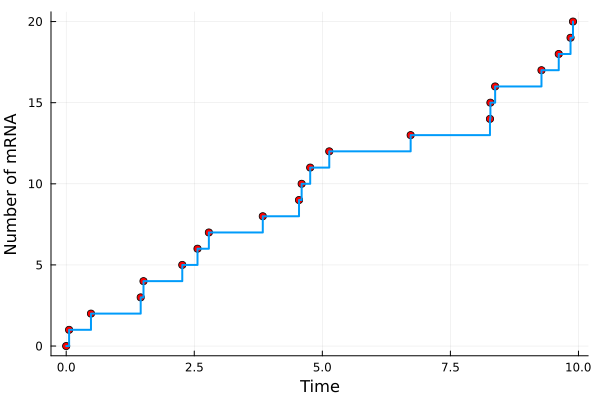

In [52]:
#Plot the data
plot(t, mRNA_count, 
    xlabel="Time", ylabel="Number of mRNA", 
    scatter=:auto, marker=:circle, markercolor=:red, 
    lw=2, line=:steppost, 
    legend=:none)


In [53]:
# Function to bin simulation data

# Inputs:
# time_data: A vector with event times. Float64
# count_data: A vector listing cumlative counts at time points in time_data. Int
# init_count: Initial count. Int
# total_T: Total time of simulation. Float64
# dt: Small interval for binning the data. Float64

#Outputs:
# time_bins: A vector with total time divided at small equal intervals. Float64
# binned_data: Vector for binned data as per the time_bins. Int

function data_binning(time_data::Vector{Float64}, count_data::Vector{Int}, init_count::Int, total_T::Float64, dt::Float64)
    time_bins = 0.0:dt:total_T
    binned_data = zeros(length(time_bins))
    binned_data[1] = init_count

    for j in 2:length(time_bins)
        idx = findlast(x -> x <= time_bins[j], time_data)
        binned_data[j] = count_data[idx]
    end

    return time_bins, binned_data
end


data_binning (generic function with 1 method)

In [54]:
# Doing multiple simulations

# Small time interval used for binning of data
dt = 0.1

# Creat time bins, vector to store average data
time_bins = 0.0:dt:T
avg_data = zeros(Float64, length(time_bins))
all_binned_data = zeros(Float64, length(time_bins), N)

# Do the independent simulations one-by-one
for j in 1:N
    
    # Simulate
    t, mRNA_count = simulate_poisson(lambda, T, mRNA_0)

    # Bin the data
    time_bins, binned_data = data_binning(t, mRNA_count, mRNA_0, T, dt)

    # Add to avg data
    avg_data += binned_data

    all_binned_data[:,j] = binned_data
    
end

# Average the data
avg_data = sum(all_binned_data, dims=2) ./ N;

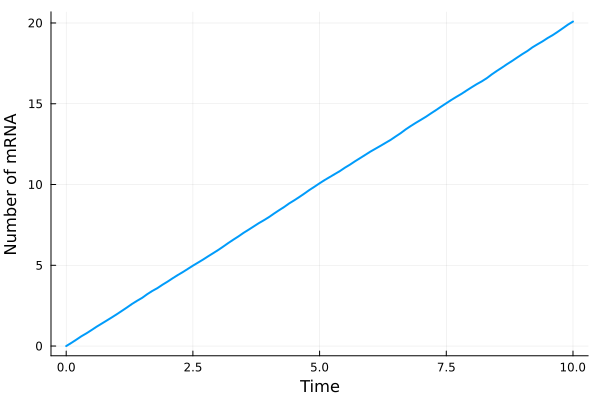

In [55]:
#Plot the average data
plot(time_bins, avg_data, 
    xlabel="Time", ylabel="Number of mRNA", 
    lw=2,  
    legend=:none)

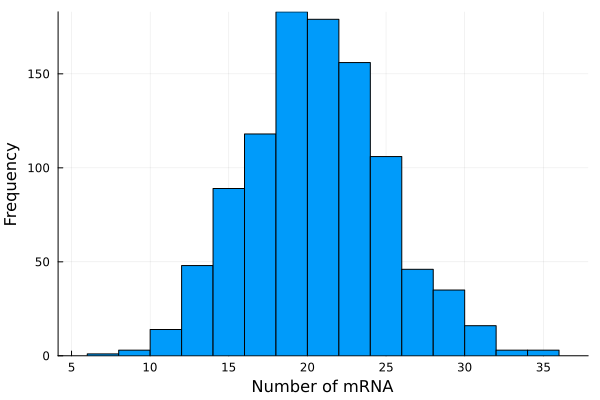

In [56]:
# Plot histogram to show distribution of mRNA in cells at the end

# Extract the last row
final_mRNA = all_binned_data[end, :]

# Plot the histogram
histogram(final_mRNA, bins=20,  xlabel="Number of mRNA", ylabel="Frequency", legend=:none)